In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("clean_data.csv")
df

,loan_term,cibil_score,loan_status,LTI_Category,LTV_Category,DTI_Category
0,0.192617,1.032792,1,1.0,0.0,1.0
1,-0.508091,-1.061051,0,0.0,1.0,2.0
2,1.594031,-0.544840,0,1.0,0.0,0.0
3,-0.508091,-0.771045,0,1.0,0.0,2.0
4,1.594031,-1.264055,0,0.0,0.0,0.0
...,...,...,...,...,...,...
4264,0.192617,-1.641063,0,0.0,0.0,0.0
4265,1.594031,-0.237434,1,1.0,0.0,0.0
4266,1.243677,-0.829046,0,1.0,1.0,1.0
4267,-0.508091,1.044393,1,1.0,0.0,2.0


In [133]:
df["LTI_Category"].unique()

array([1., 0.])

In [3]:
X=df.drop("loan_status",axis=1)
y=df["loan_status"]

In [4]:
df["loan_status"].value_counts()

loan_status
1    2656
0    1613
Name: count, dtype: int64

In [5]:
cn=df["loan_status"].value_counts()
ratio=cn.max()/cn.min()
if ratio>2:
    print(f"Imbalanced Record {ratio}")
else:
    print(f"balanced Record {ratio}")
# it is a imbalnce data set

balanced Record 1.6466212027278364


**Importing Library**

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV,cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay,precision_recall_curve,PrecisionRecallDisplay,average_precision_score,roc_curve,auc,RocCurveDisplay,roc_auc_score

In [9]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Logistic Regression**

In [10]:
# modelling
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [11]:
y_pred_train = log_model.predict(X_train)
print( "Accuracy of train Data",accuracy_score(y_train,y_pred_train))
cv = cross_val_score(log_model,X_train,y_train,cv=5,scoring = "accuracy").mean()
print("CV Score",cv)

Accuracy of train Data 0.9171303074670571
CV Score 0.9162518301610543


In [12]:
# predicting
y_pred_test = log_model.predict(X_test)
print( "Accuracy of test Data",accuracy_score(y_test,y_pred_test))

Accuracy of test Data 0.9028103044496487


In [13]:
cm_lr=confusion_matrix(y_test,y_pred_test)
cm_lr

array([[275,  43],
       [ 40, 496]], dtype=int64)

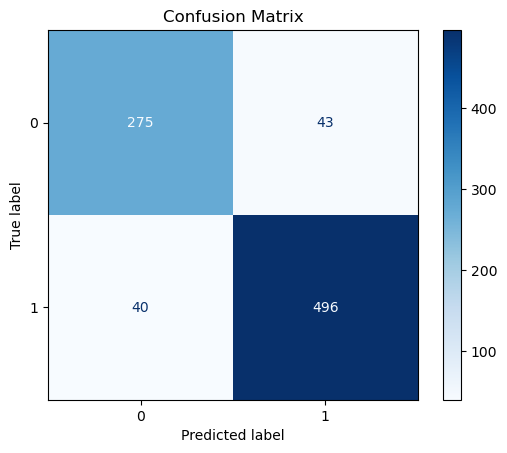

In [14]:
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

In [15]:
print(f"Classification Report \n{classification_report(y_test,y_pred_test)}")

Classification Report 
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       318
           1       0.92      0.93      0.92       536

    accuracy                           0.90       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.90      0.90       854



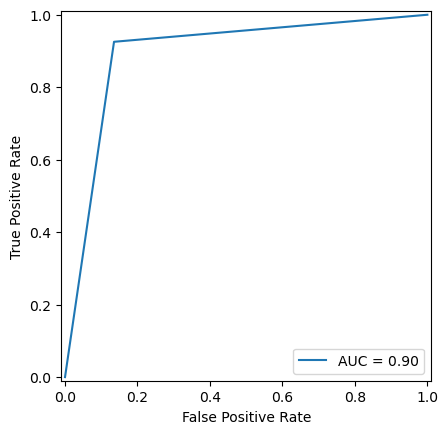

In [16]:
fpr,tpr,thresold=roc_curve(y_test,y_pred_test)
roc_auc=auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

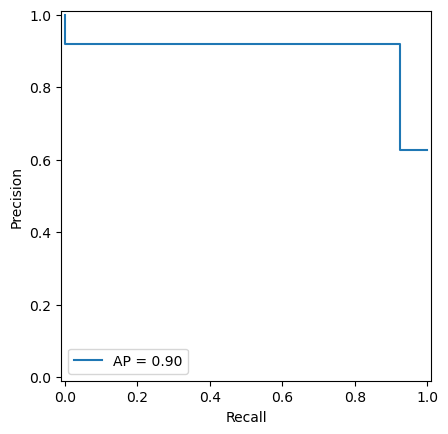

In [17]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test)
PrecisionRecallDisplay(precision,recall, average_precision=average_precision_score(y_test, y_pred_test)).plot()

**KNN**

In [18]:
# HPT for knn
estimator= KNeighborsClassifier()
param_grid={"n_neighbors":list(range(1,20)),"p":[1,2]}
knn_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
knn_grid.fit(X_train,y_train)
knn=knn_grid.best_estimator_
knn

KNeighborsClassifier(n_neighbors=1, p=1)

In [19]:
knn_model=knn_grid.best_estimator_
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1, p=1)

In [20]:
knn_y_pred_train = knn_model.predict(X_train)
print( "Accuracy of train Data",accuracy_score(y_train,knn_y_pred_train))
cv = cross_val_score(knn_model,X_train,y_train,cv=5,scoring = "accuracy").mean()
print("CV Score",cv)

# predicting
knn_y_pred_test = knn_model.predict(X_test)
print( "Accuracy of test Data",accuracy_score(y_test,knn_y_pred_test))

Accuracy of train Data 0.9994143484626647
CV Score 0.9841874084919473
Accuracy of test Data 0.9882903981264637


In [21]:
cm_knn=confusion_matrix(y_test,knn_y_pred_test)
cm_knn

array([[314,   4],
       [  6, 530]], dtype=int64)

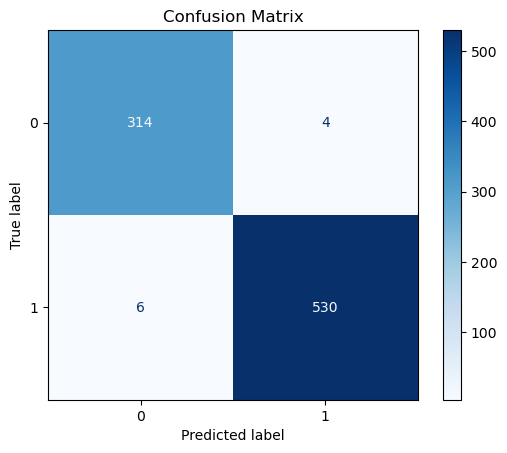

In [22]:
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

In [23]:
print(f"Classification Report \n{classification_report(y_test,knn_y_pred_test)}")

Classification Report 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       318
           1       0.99      0.99      0.99       536

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854



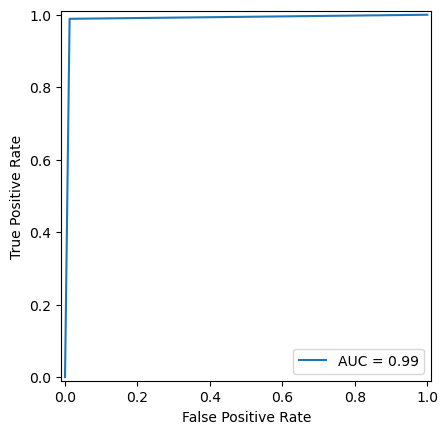

In [24]:
fpr,tpr,thresold=roc_curve(y_test,knn_y_pred_test)
roc_auc=auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

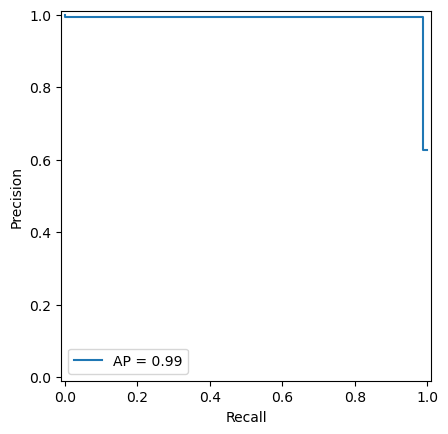

In [25]:
precision, recall, thresholds = precision_recall_curve(y_test, knn_y_pred_test)
PrecisionRecallDisplay(precision,recall, average_precision=average_precision_score(y_test, knn_y_pred_test)).plot()

**SVM**

In [26]:
# HPT for SVm
estimator= SVC()
param_grid={"C":[0.01,0.1,1.0],"kernel":["linear","poly","sigmoid","rbf"]}
svm_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
svm_grid.fit(X_train,y_train)
svm_grid.best_estimator_

SVC()

In [27]:
#Modelling
svm_model=svm_grid.best_estimator_
svm_model.fit(X_train,y_train)

SVC()

In [28]:
svm_y_pred_train = svm_model.predict(X_train)
print( "Accuracy of train Data",accuracy_score(y_train,svm_y_pred_train))
cv = cross_val_score(svm_model,X_train,y_train,cv=5,scoring = "accuracy").mean()
print("CV Score",cv)

# predicting
svm_y_pred_test = svm_model.predict(X_test)
print( "Accuracy of test Data",accuracy_score(y_test,svm_y_pred_test))

Accuracy of train Data 0.9838945827232797
CV Score 0.9803806734992679
Accuracy of test Data 0.9824355971896955


In [29]:
cm_svm=confusion_matrix(y_test,svm_y_pred_test)
cm_svm

array([[313,   5],
       [ 10, 526]], dtype=int64)

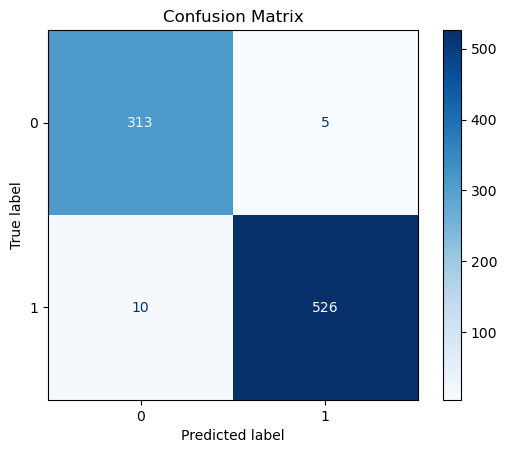

In [30]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

In [31]:
print(classification_report(y_test,svm_y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       318
           1       0.99      0.98      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



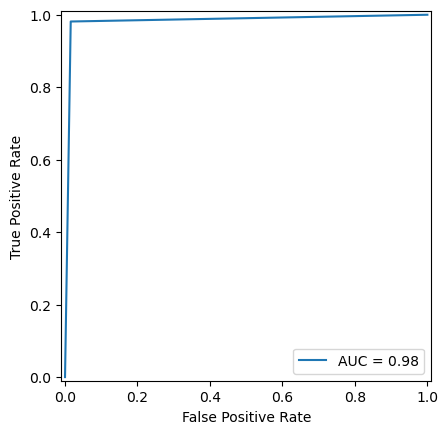

In [32]:
fpr,tpr,thresold=roc_curve(y_test,svm_y_pred_test)
roc_auc=auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

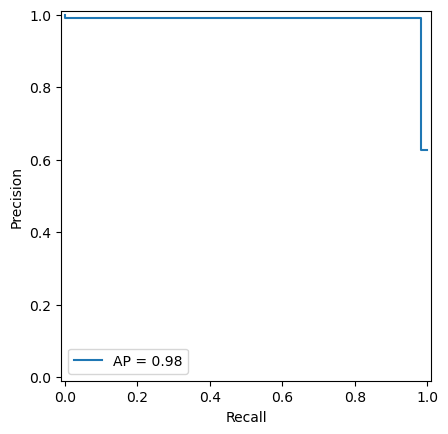

In [33]:
precision, recall, thresholds = precision_recall_curve(y_test, svm_y_pred_test)
PrecisionRecallDisplay(precision,recall, average_precision=average_precision_score(y_test, svm_y_pred_test)).plot()


**Decision Tree**

In [34]:
# initial decision tree
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

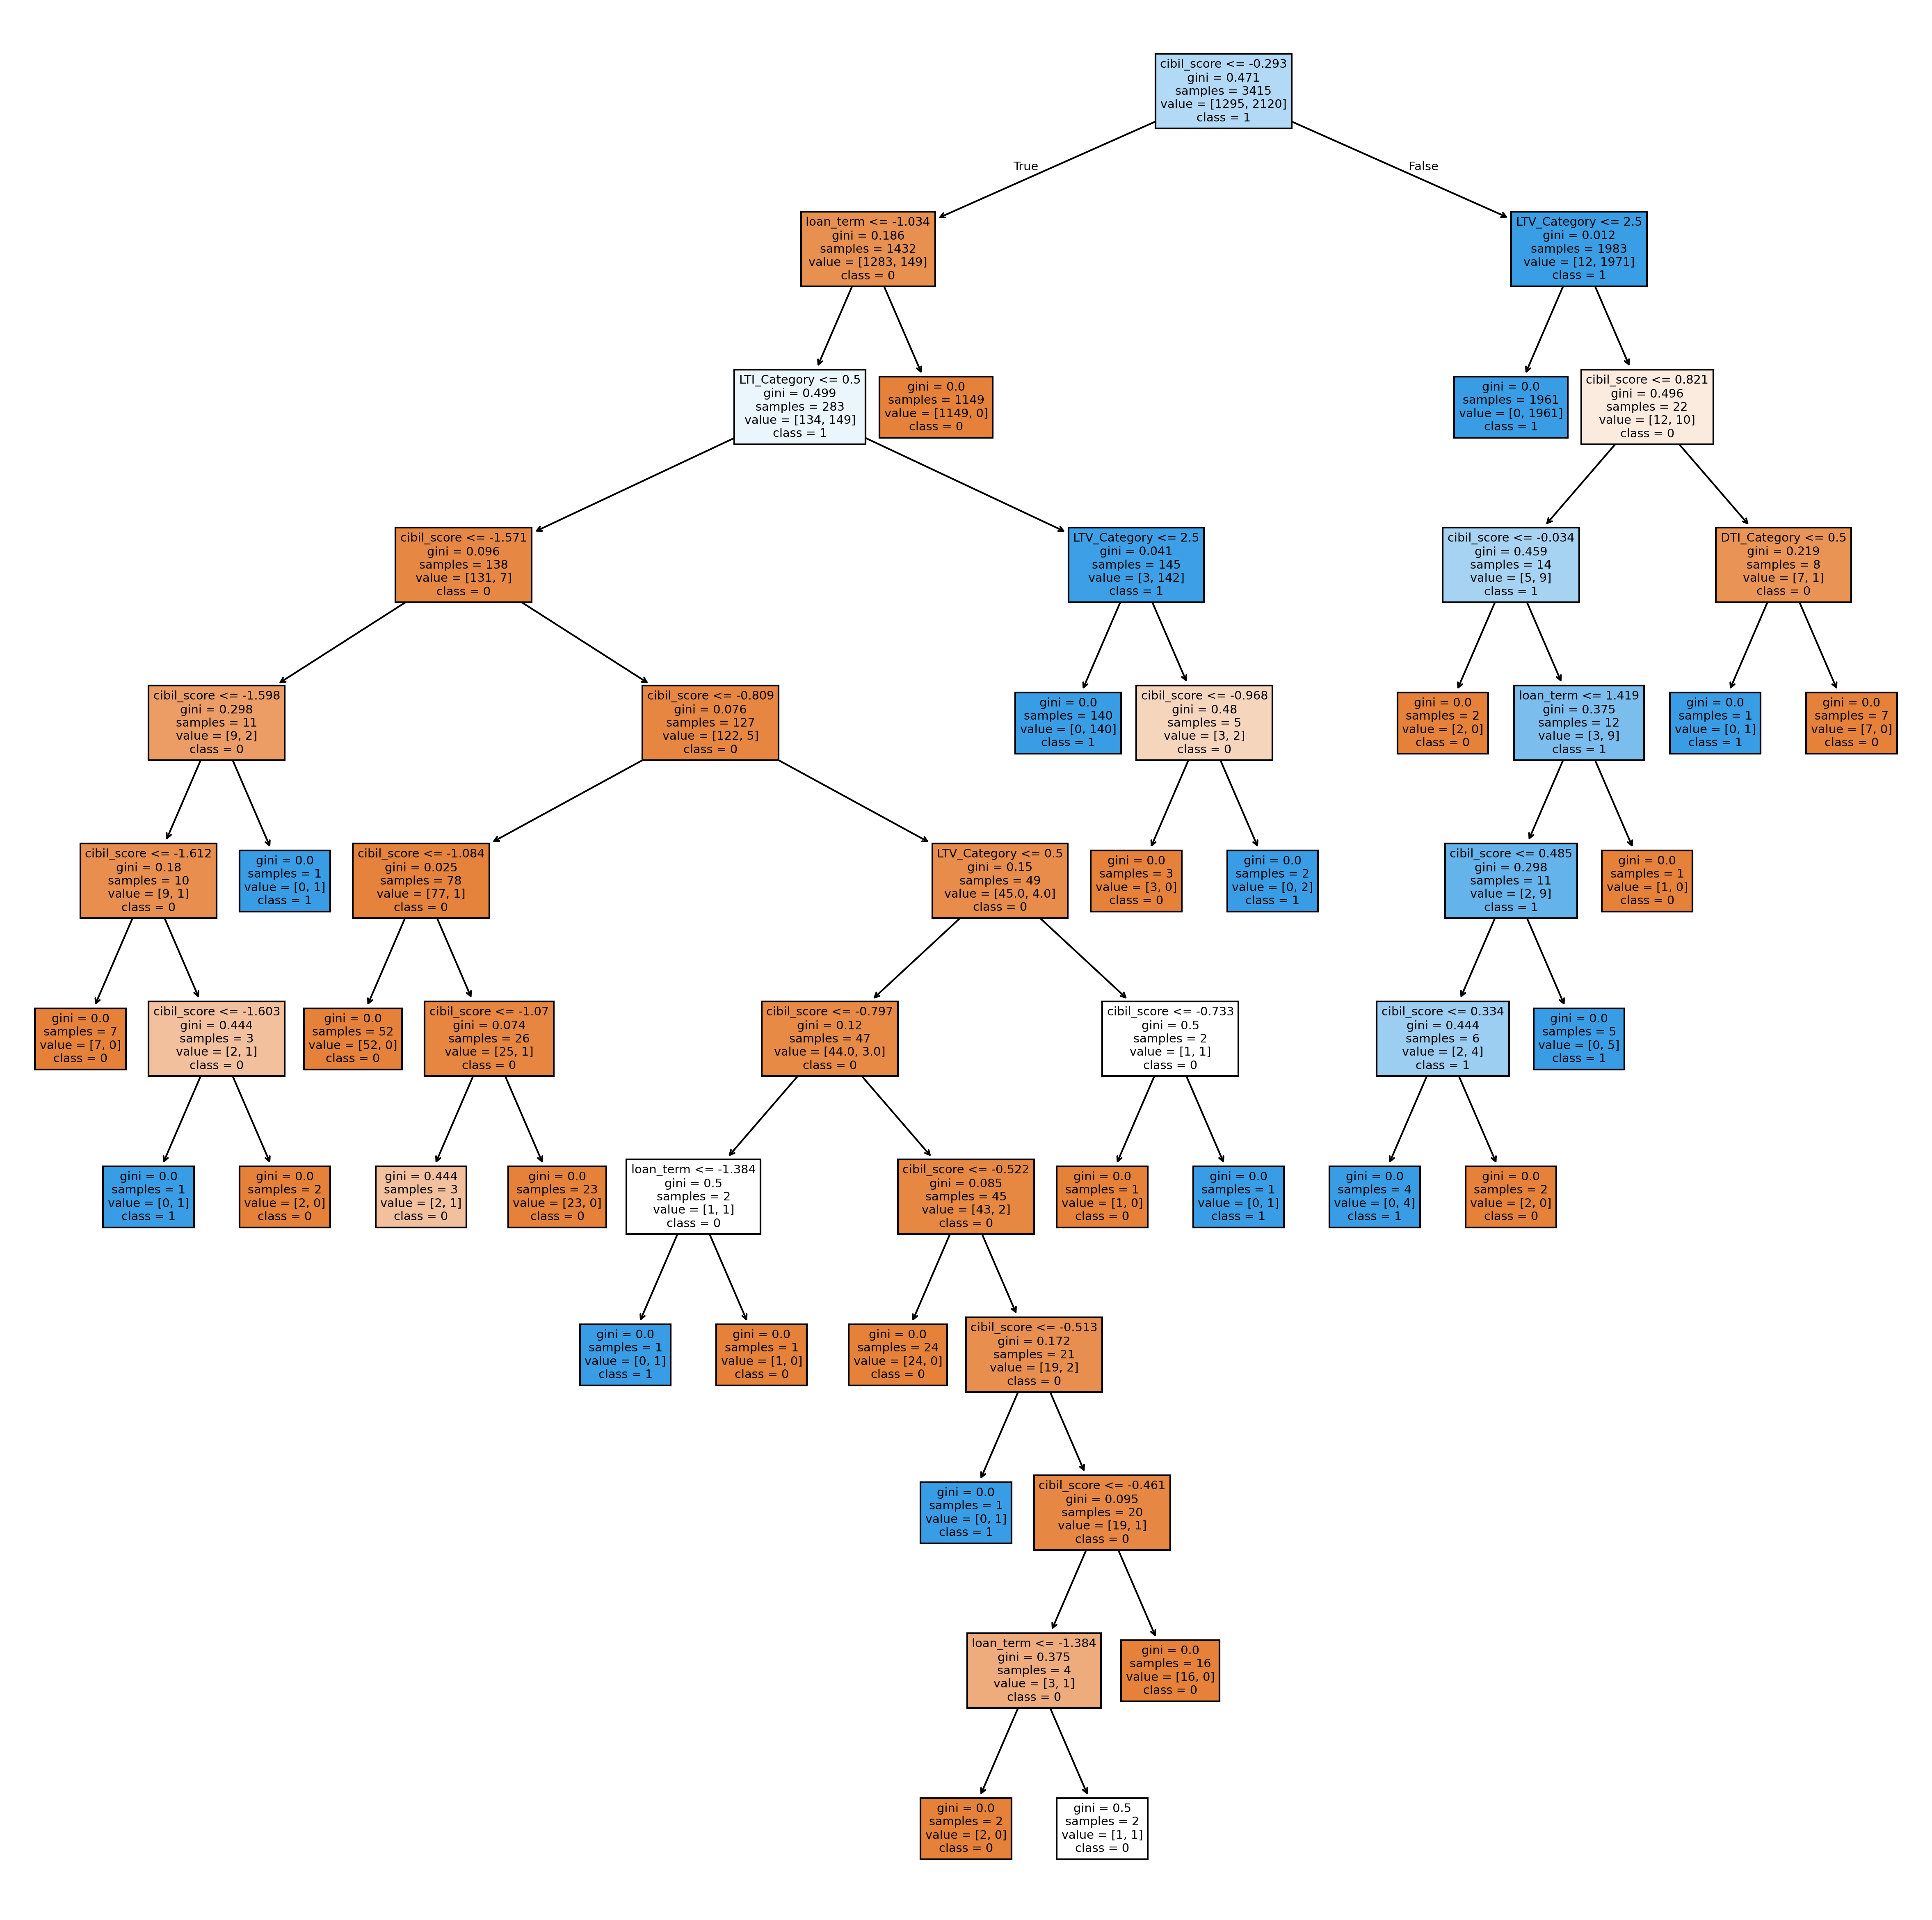

In [35]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20),dpi=300)
plot_tree(model_dt,filled=True,feature_names=X_train.columns.tolist(),class_names=['0','1'])
plt.show()

In [36]:
# HPT of dt
estimator= DecisionTreeClassifier()
param_grid={"criterion":["ginni","entropy"],"max_depth":list(range(1,20))}
dt_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
dt_grid.fit(X_train,y_train)
dt=dt_grid.best_estimator_
dt

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [37]:
#Important Feature        # feature selection using Decision Tree
feature=pd.DataFrame(data=dt.feature_importances_,index=X_train.columns,columns=["Important"])
important_feature=feature[feature["Important"]>0].index.tolist()
important_feature

['loan_term', 'cibil_score', 'LTI_Category', 'LTV_Category', 'DTI_Category']

In [38]:
# modelling With important feature and best estimator
X_train_dt=X_train[important_feature]

# modelling
dt_model= dt_grid.best_estimator_
dt_model.fit(X_train_dt,y_train)

# prediction & evaluation
y_pred_dt= dt_model.predict(X_train_dt)

print("Train accuracy",accuracy_score(y_train,y_pred_dt))

print( "Coss-Validation Score" , cross_val_score(dt_model,X_train_dt,y_train,cv=5,scoring="accuracy").mean())


Train accuracy 0.9964860907759883
Coss-Validation Score 0.9935578330893119


In [39]:
# predicting
X_test_dt=X_test[important_feature]
dt_y_pred_test = dt_model.predict(X_test_dt)
print( "Accuracy of test Data",accuracy_score(y_test,dt_y_pred_test))

Accuracy of test Data 0.9976580796252927


In [40]:
cm_dt=confusion_matrix(y_test,dt_y_pred_test)
cm_dt

array([[317,   1],
       [  1, 535]], dtype=int64)

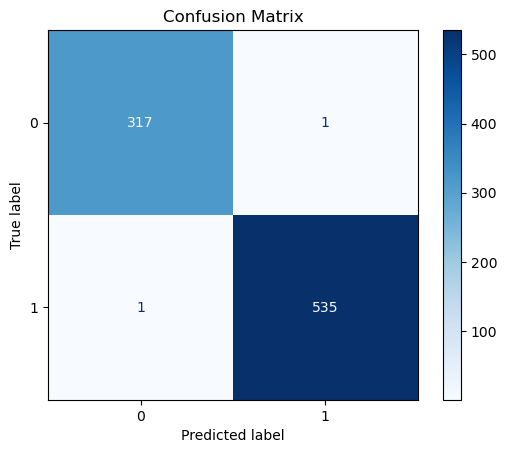

In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

In [42]:
print(classification_report(y_test,dt_y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       318
           1       1.00      1.00      1.00       536

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854



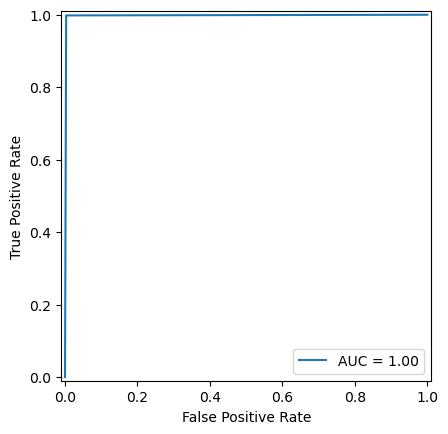

In [43]:
fpr,tpr,thresold=roc_curve(y_test,dt_y_pred_test)
roc_auc=auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

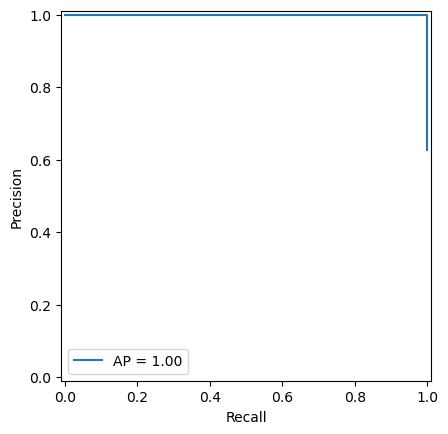

In [44]:
precision, recall, thresholds = precision_recall_curve(y_test, dt_y_pred_test)
PrecisionRecallDisplay(precision,recall, average_precision=average_precision_score(y_test, dt_y_pred_test)).plot()

**Ensemble**

**Random Forest**

In [47]:
#HPT
estimator = RandomForestClassifier(random_state=True)
param_grid = {"n_estimators":list(range(1,20))}
rf_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
rf_grid.fit(X_train,y_train)

# Random Forest best Hyperparameter Tuning
rf = rf_grid.best_estimator_
rf

RandomForestClassifier(n_estimators=10, random_state=True)

In [48]:
#Important Feature        # feature selection using Random Forest
feature_rf=pd.DataFrame(data=rf.feature_importances_,index=X_train.columns,columns=["Important"])
important_feature_rf=feature_rf[feature_rf["Important"]>0].index.tolist()
important_feature_rf

['loan_term', 'cibil_score', 'LTI_Category', 'LTV_Category', 'DTI_Category']

In [49]:
# modelling With important feature and best estimator
X_train_rf=X_train[important_feature_rf]
X_test_rf=X_test[important_feature_rf]

# modelling
rf_model= rf_grid.best_estimator_
rf_model.fit(X_train_rf,y_train)

# prediction & evaluation
y_pred_rf= rf_model.predict(X_train_rf)

print("Train accuracy",accuracy_score(y_train,y_pred_rf))

print( "Coss-Validation Score" , cross_val_score(rf_model,X_train_rf,y_train,cv=5,scoring="accuracy").mean())


Train accuracy 0.9988286969253294
Coss-Validation Score 0.9929721815519766


In [50]:
# predicting
rf_y_pred_test = rf_model.predict(X_test_rf)
print( "Accuracy of test Data",accuracy_score(y_test,rf_y_pred_test))

Accuracy of test Data 0.9988290398126464


In [51]:
cm_rf=confusion_matrix(y_test,rf_y_pred_test)
cm_rf

array([[318,   0],
       [  1, 535]], dtype=int64)

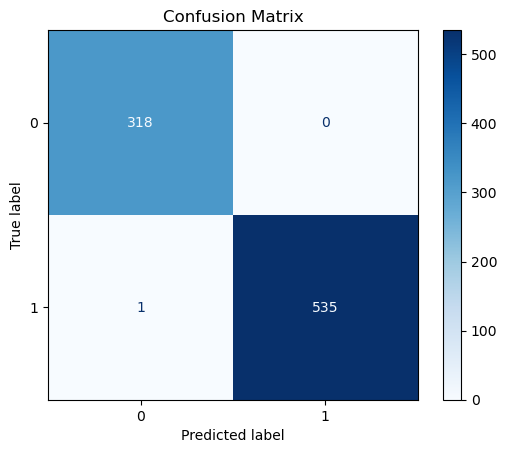

In [53]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

In [52]:
print(classification_report(y_test,rf_y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       318
           1       1.00      1.00      1.00       536

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854



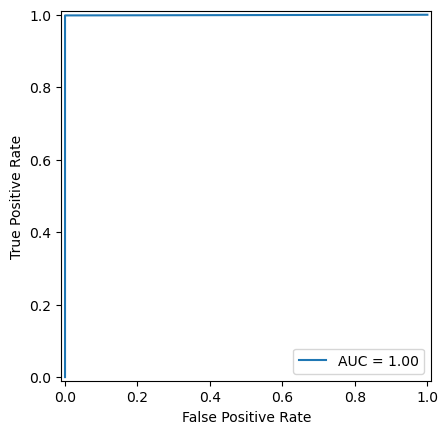

In [54]:
fpr,tpr,thresold=roc_curve(y_test,rf_y_pred_test)
roc_auc=auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

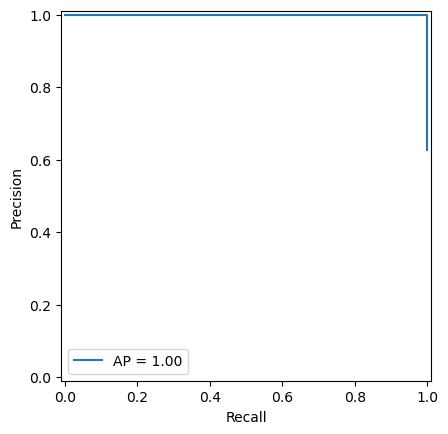

In [55]:
precision, recall, thresholds = precision_recall_curve(y_test, rf_y_pred_test)
PrecisionRecallDisplay(precision,recall, average_precision=average_precision_score(y_test, rf_y_pred_test)).plot()

**Ada Boost**

In [56]:
# HPT for AdaBoost
estimator= AdaBoostClassifier(random_state=True)
param_grid={"n_estimators":list(range(1,20))}
ad_b_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
ad_b_grid.fit(X_train,y_train)
ad_b=ad_b_grid.best_estimator_
ad_b

AdaBoostClassifier(n_estimators=6, random_state=True)

In [57]:
#Important Feature        # feature selection using Decision Tree
feature_ad=pd.DataFrame(data=ad_b.feature_importances_,index=X_train.columns,columns=["Important"])
important_feature_ad=feature_ad[feature_ad["Important"]>0].index.tolist()
important_feature_ad

['loan_term', 'cibil_score', 'LTI_Category', 'LTV_Category']

In [58]:
# modelling With important feature and best estimator
X_train_ad_b=X_train[important_feature_ad]
X_test_ad_b=X_test[important_feature_ad]

# modelling
ad_model= ad_b_grid.best_estimator_
ad_model.fit(X_train_ad_b,y_train)

# prediction & evaluation
y_pred_ad= ad_model.predict(X_train_ad_b)

print("Train accuracy",accuracy_score(y_train,y_pred_ad))

print( "Coss-Validation Score" , cross_val_score(ad_model,X_train_ad_b,y_train,cv=5,scoring="accuracy").mean())


Train accuracy 0.9929721815519765
Coss-Validation Score 0.9941434846266471


In [59]:
# predicting
ad_y_pred_test = ad_model.predict(X_test_ad_b)
print( "Accuracy of test Data",accuracy_score(y_test,ad_y_pred_test))

Accuracy of test Data 0.9964871194379391


In [60]:
cm_ad=confusion_matrix(y_test,ad_y_pred_test)
cm_ad

array([[316,   2],
       [  1, 535]], dtype=int64)

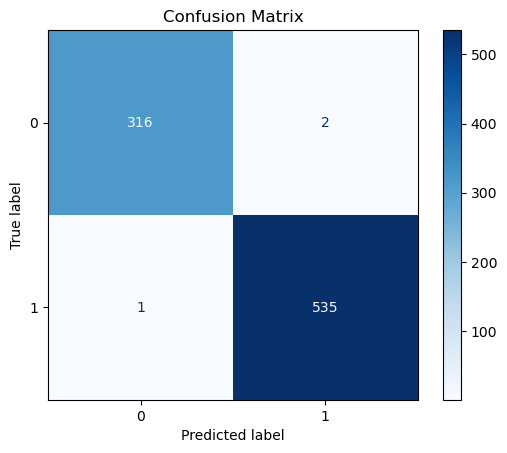

In [61]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ad)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

In [62]:
print(classification_report(y_test,ad_y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       318
           1       1.00      1.00      1.00       536

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854



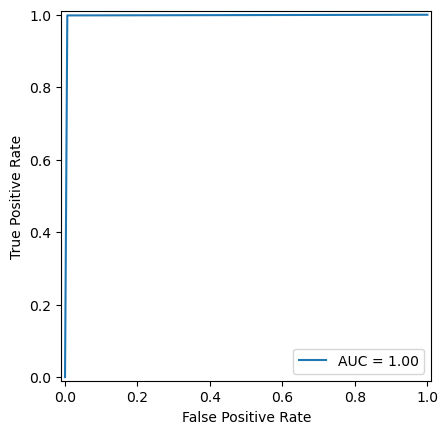

In [63]:
fpr,tpr,thresold=roc_curve(y_test,ad_y_pred_test)
roc_auc=auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

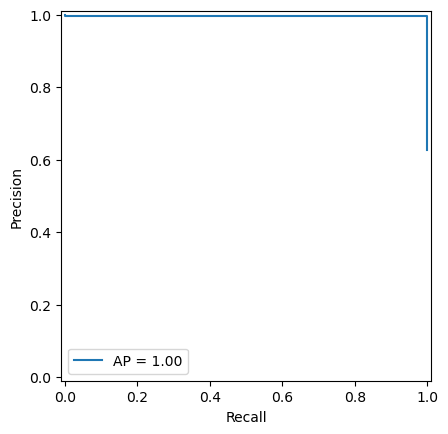

In [64]:
precision, recall, thresholds = precision_recall_curve(y_test, ad_y_pred_test)
PrecisionRecallDisplay(precision,recall, average_precision=average_precision_score(y_test, ad_y_pred_test)).plot()

**Gradient Boost**

In [65]:
# HPT for Fradient Boost
estimator= GradientBoostingClassifier(random_state=True)
param_grid={"n_estimators":list(range(1,20)),
           "learning_rate":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
gb_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
gb_grid.fit(X_train,y_train)
gb=gb_grid.best_estimator_
gb

GradientBoostingClassifier(learning_rate=0.3, n_estimators=1, random_state=True)

In [66]:
#Important Feature        # feature selection using Decision Tree
feature_gb=pd.DataFrame(data=gb.feature_importances_,index=X_train.columns,columns=["Important"])
important_feature_gb=feature_gb[feature_gb["Important"]>0].index.tolist()
important_feature_gb

['loan_term', 'cibil_score', 'LTI_Category', 'LTV_Category']

In [67]:
X_train_gb=X_train[important_feature_gb]
# modelling
gb_model=gb_grid.best_estimator_
gb_model.fit(X_train_gb,y_train)

# prediction & evaluation
y_pred_gb= gb_model.predict(X_train_gb)

print("accuracy score of train data",accuracy_score(y_train,y_pred_gb))

print( "Coss-Validation Score" , cross_val_score(gb_model,X_train_gb,y_train,cv=5,scoring="accuracy").mean())

accuracy score of train data 0.9953147877013178
Coss-Validation Score 0.9947291361639825


In [68]:
# predicting
X_test_gb=X_test[important_feature_gb]
gb_y_pred_test = gb_model.predict(X_test_gb)
print( "Accuracy of test Data",accuracy_score(y_test,gb_y_pred_test))

Accuracy of test Data 0.9976580796252927


In [69]:
cm_gb=confusion_matrix(y_test,gb_y_pred_test)
cm_gb

array([[317,   1],
       [  1, 535]], dtype=int64)

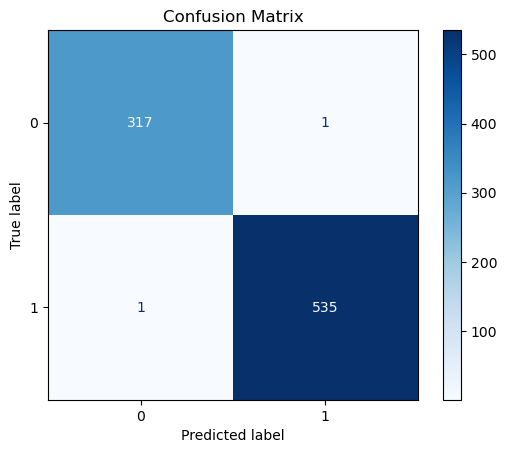

In [85]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gb)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

In [70]:
print(classification_report(y_test,gb_y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       318
           1       1.00      1.00      1.00       536

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854



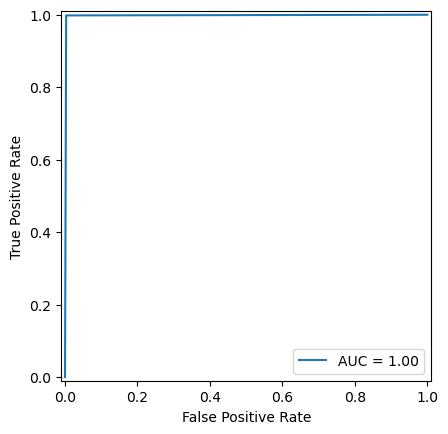

In [71]:
fpr,tpr,thresold=roc_curve(y_test,gb_y_pred_test)
roc_auc=auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

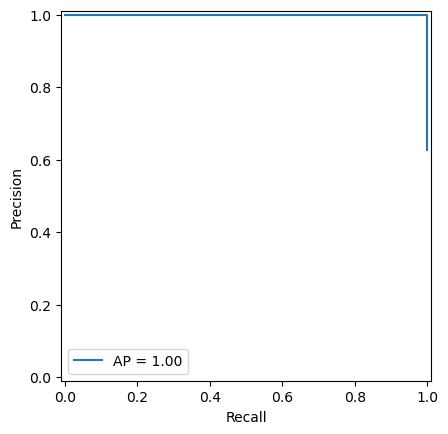

In [83]:
precision, recall, thresholds = precision_recall_curve(y_test, gb_y_pred_test)
PrecisionRecallDisplay(precision,recall, average_precision=average_precision_score(y_test, gb_y_pred_test)).plot()

**Xgboost**

In [73]:
# HPT for Xgboost
estimator= XGBClassifier()
param_grid={"n_estimators":list(range(1,30)),
           "max_depth":[3, 5, 7, 9],"gamma":[0.1,0.5,0.8,1.0]}
xgb_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
xgb_grid.fit(X_train,y_train)
xgb=xgb_grid.best_estimator_
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=8, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [74]:
#Important Feature        # feature selection using Xgboost
feature_xgb=pd.DataFrame(data=xgb.feature_importances_,index=X.columns,columns=["Important"])
important_feature_xgb=feature_xgb[feature_xgb["Important"]>0].index.tolist()
important_feature_xgb

['loan_term', 'cibil_score', 'LTI_Category', 'LTV_Category', 'DTI_Category']

In [75]:
# modelling With important feature and best estimator
X_train_xgb=X_train[important_feature_xgb]
X_test_xgb=X_test[important_feature_xgb]

# modelling
xgb_model= ad_b_grid.best_estimator_
xgb_model.fit(X_train_xgb,y_train)

# prediction & evaluation
y_pred_xgb= ad_model.predict(X_train_xgb)

print("Train accuracy",accuracy_score(y_train,y_pred_xgb))

print( "Coss-Validation Score" , cross_val_score(ad_model,X_train_xgb,y_train,cv=5,scoring="accuracy").mean())


Train accuracy 0.9929721815519765
Coss-Validation Score 0.9941434846266471


In [76]:
# predicting
xgb_y_pred_test = xgb_model.predict(X_test_xgb)
print( "Accuracy of test Data",accuracy_score(y_test,xgb_y_pred_test))

Accuracy of test Data 0.9964871194379391


In [77]:
cm_xgb=confusion_matrix(y_test,xgb_y_pred_test)
cm_xgb

array([[316,   2],
       [  1, 535]], dtype=int64)

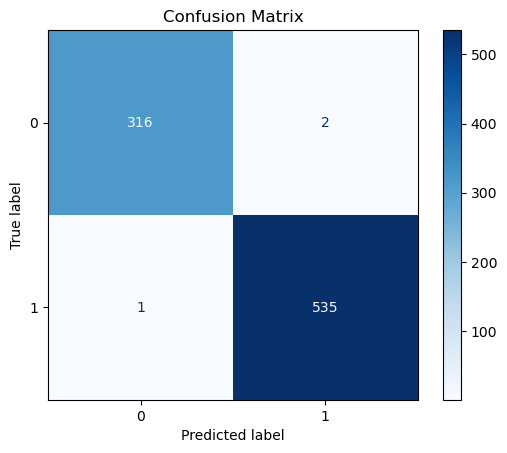

In [79]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

In [80]:
print(classification_report(y_test,xgb_y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       318
           1       1.00      1.00      1.00       536

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854



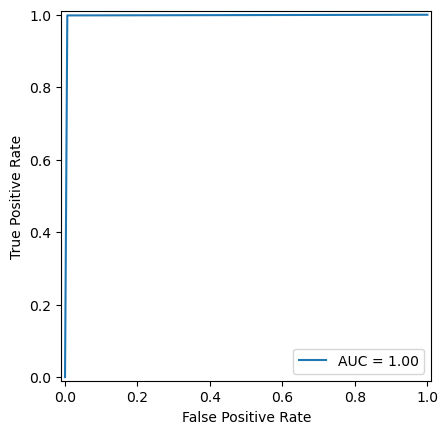

In [81]:
fpr,tpr,thresold=roc_curve(y_test,xgb_y_pred_test)
roc_auc=auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

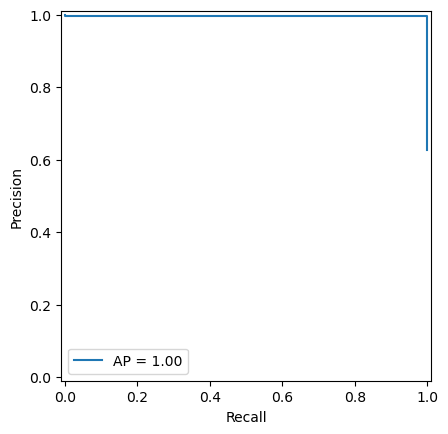

In [82]:
precision, recall, thresholds = precision_recall_curve(y_test, xgb_y_pred_test)
PrecisionRecallDisplay(precision,recall, average_precision=average_precision_score(y_test, xgb_y_pred_test)).plot()

In [125]:
import pickle
pickle.dump(rf_model,open("loan_prediction.pkl","wb"))

**predicting**

In [126]:
import pandas as pd

data = pd.DataFrame({
    'no_of_dependents': [2], 
    'education': ["Graduate"], 
    'self_employed': ["Yes"],
    'income_annum': [850000], 
    'loan_amount': [500000], 
    'loan_term': [5], 
    'cibil_score': [814],
    'residential_assets_value': [0], 
    'commercial_assets_value': [0],
    'luxury_assets_value': [0], 
    'bank_asset_value': [600000]
})

In [114]:
data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,Graduate,Yes,850000,500000,5,814,0,0,0,600000


In [115]:
data["total_assest"]=data["residential_assets_value"]+data["commercial_assets_value"]+data["luxury_assets_value"]+data["bank_asset_value"]

In [116]:
data["monthly"]=data["income_annum"]/12
data["month_loan"]=(data["loan_amount"]/data["loan_term"])/12

In [117]:
data["DTI"]= data["month_loan"]/data["monthly"]  # Monthly loan to income ratio 
data["LTV"]=data["loan_amount"]/data["total_assest"]  # loan to value ratio
data['LTI'] = data['loan_amount'] / data['income_annum']   #total loan amount to annual income

In [118]:
# LTI
data['LTI_Category'] = pd.cut(data['LTI'], bins=[0, 3, 5, 50], labels=['Low', 'Moderate', 'High'])

# LTV
data['LTV_Category'] = pd.cut(data['LTV'], bins=[0, 0.6, 0.8, 0.95, 2], labels=['Low Risk', 'Moderate Risk', 'High Risk', 'Critical'])

# DTI
data['DTI_Category'] = pd.cut(data['DTI'], bins=[0, 0.2, 0.35, 0.5,5], labels=['Low', 'Moderate', 'High', 'Critical'])


In [119]:
from sklearn.preprocessing import OrdinalEncoder
encoder_lti = OrdinalEncoder(categories=[['Low', 'Moderate', 'High']])
data["LTI_Category"]=encoder_lti.fit_transform(data[["LTI_Category"]])

encoder_ltv=OrdinalEncoder(categories=[['Low Risk', 'Moderate Risk', 'High Risk', 'Critical']])
data["LTV_Category"]=encoder_ltv.fit_transform(data[["LTV_Category"]])

encoder_dti=OrdinalEncoder(categories=[['Low', 'Moderate', 'High', 'Critical']])
data["DTI_Category"]=encoder_dti.fit_transform(data[["DTI_Category"]])

In [120]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler()
data[['loan_term', 'cibil_score']] = scaler.fit_transform(data[['loan_term', 'cibil_score']])

In [121]:
data.drop(columns=["monthly","month_loan",'residential_assets_value',"LTI","LTV","DTI",
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value','no_of_dependents', 'education', 'self_employed',"income_annum","loan_amount","total_assest"],inplace=True)   # droping columns

In [122]:
data

,loan_term,cibil_score,LTI_Category,LTV_Category,DTI_Category
0,0.0,0.0,0.0,2.0,0.0


In [123]:
test= rf_model.predict(data)

In [124]:
test

array([1], dtype=int64)

In [128]:
def loan_prediction(input_data, rf_model):
    # Convert input data to DataFrame
    data = pd.DataFrame(input_data)
    
    # Calculate total assets
    data["total_assest"] = data["residential_assets_value"] + data["commercial_assets_value"] + data["luxury_assets_value"] + data["bank_asset_value"]
    
    # Calculate monthly income and monthly loan amount
    data["monthly"] = data["income_annum"] / 12
    data["month_loan"] = (data["loan_amount"] / data["loan_term"]) / 12
    
    # Calculate DTI, LTV, and LTI
    data["DTI"] = data["month_loan"] / data["monthly"]  # Monthly loan to income ratio 
    data["LTV"] = data["loan_amount"] / data["total_assest"]  # loan to value ratio
    data['LTI'] = data['loan_amount'] / data['income_annum']   # total loan amount to annual income
    
    # Categorize into bins for LTI, LTV, and DTI
    data['LTI_Category'] = pd.cut(data['LTI'], bins=[0, 3, 5, 50], labels=['Low', 'Moderate', 'High'])
    data['LTV_Category'] = pd.cut(data['LTV'], bins=[0, 0.6, 0.8, 0.95, 2], labels=['Low Risk', 'Moderate Risk', 'High Risk', 'Critical'])
    data['DTI_Category'] = pd.cut(data['DTI'], bins=[0, 0.2, 0.35, 0.5, 5], labels=['Low', 'Moderate', 'High', 'Critical'])
    
    # Ordinal Encoding
    encoder_lti = OrdinalEncoder(categories=[['Low', 'Moderate', 'High']])
    data["LTI_Category"] = encoder_lti.fit_transform(data[["LTI_Category"]])
    
    encoder_ltv = OrdinalEncoder(categories=[['Low Risk', 'Moderate Risk', 'High Risk', 'Critical']])
    data["LTV_Category"] = encoder_ltv.fit_transform(data[["LTV_Category"]])
    
    encoder_dti = OrdinalEncoder(categories=[['Low', 'Moderate', 'High', 'Critical']])
    data["DTI_Category"] = encoder_dti.fit_transform(data[["DTI_Category"]])
    
    # Scaling the features
    scaler = StandardScaler()
    data[['loan_term', 'cibil_score']] = scaler.fit_transform(data[['loan_term', 'cibil_score']])
    
    # Drop columns that are not needed for prediction
    data.drop(columns=["monthly", "month_loan", 'residential_assets_value', "LTI", "LTV", "DTI",
                       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'no_of_dependents', 
                       'education', 'self_employed', "income_annum", "loan_amount", "total_assest"], inplace=True)
    
    # Make prediction using the trained random forest model
    prediction = rf_model.predict(data)
    
    return prediction

In [129]:
 loan_prediction(data, rf_model)

array([1], dtype=int64)